
# Classification of  hand-written digits using scikit-learn


An example showing how we can classify hand-written digits using scikit-learn. 
The example is adapted from 

https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html



In [76]:
from sklearn import datasets, svm, metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier 
from sklearn.svm import SVC 
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


Load the dataset

In [77]:
digits = datasets.load_digits()

Print the dataset

In [78]:
print(digits)

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0

plot the data with associated labels

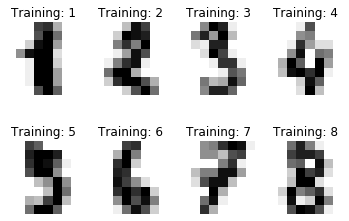

In [79]:
fig = plt.figure()
for index in range(8):
    plt.subplot(2, 4, index+1)
    plt.axis('off')
    plt.imshow(digits.data[index+1,:].reshape(8,8),cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % digits.target[index+1])

Pixel values will be the input (X) and labels will be the output (y)

In [80]:
X = digits.data
y= digits.target

Split data into train and test subsets

In [81]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, shuffle=True)

Import different classifiers

In [82]:
# Multinomial Naive Bayes Classifier  
def naive_bayes_classifier(train_x, train_y):  
    from sklearn.naive_bayes import MultinomialNB  
    model = MultinomialNB(alpha=0.01)  
    model.fit(train_x, train_y)  
    return model  
  
  
# KNN Classifier  
def knn_classifier(train_x, train_y):  
    from sklearn.neighbors import KNeighborsClassifier  
    model = KNeighborsClassifier(n_neighbors=3)
    model.fit(train_x, train_y)  
    return model  
  
  
# Logistic Regression Classifier  
def logistic_regression_classifier(train_x, train_y):  
    from sklearn.linear_model import LogisticRegression  
    model = LogisticRegression(penalty='l2')  
    model.fit(train_x, train_y)  
    return model  
  
  
# Random Forest Classifier  
def random_forest_classifier(train_x, train_y):  
    from sklearn.ensemble import RandomForestClassifier  
    model = RandomForestClassifier(n_estimators=8)  
    model.fit(train_x, train_y)  
    return model  
  
  

  
# GBDT(Gradient Boosting Decision Tree) Classifier  
def gradient_boosting_classifier(train_x, train_y):  
    from sklearn.ensemble import GradientBoostingClassifier  
    model = GradientBoostingClassifier(n_estimators=200)  
    model.fit(train_x, train_y)  
    return model  
  
  
# SVM Classifier  
def svm_classifier(train_x, train_y):  
    from sklearn.svm import SVC  
    model = SVC(kernel='rbf', probability=True)  
    model.fit(train_x, train_y)  
    return model  
  
#MLP Classifier
def mlp_classifier(train_x,train_y):
    from sklearn.neural_network import MLPClassifier
    model =  MLPClassifier(hidden_layer_sizes=(100,), max_iter=15, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)
    model.fit(train_x,train_y)
    return model

Choose a classifier:

In [83]:
model = random_forest_classifier(X_train, y_train)

Now predict the value of the digit of the test dataset

In [84]:
predicted = model.predict(X_test)

In [85]:
print (predicted)

[1 7 6 8 5 2 6 5 6 7 1 6 7 3 6 5 5 0 3 3 4 5 0 5 5 8 3 9 2 4 4 4 2 7 3 6 0
 0 2 6 4 1 1 4 1 4 3 3 4 2 6 1 5 4 9 2 8 1 1 0 8 7 3 3 9 0 3 3 9 8 2 9 7 0
 3 1 7 5 9 8 6 0 9 6 0 9 1 2 5 1 5 7 5 0 0 5 6 4 7 1 0 5 8 5 0 2 0 0 0 3 7
 2 0 4 1 3 0 7 8 8 4 3 0 8 3 1 5 3 2 5 8 5 9 5 2 0 9 8 6 4 7 2 2 1 1 8 1 6
 2 5 0 9 5 8 1 2 3 8 0 9 5 3 3 6 0 2 5 6 6 9 5 6 5 9 7 9 4 9 0 8 8 7 8 6 0
 8 8 9 2 1 9 5 0 6 6 3 0 7 2 1 1 1 9 1 7 7 7 7 8 2 0 6 6 7 8 5 6 4 7 3 5 9
 8 5 8 0 5 4 2 5 3 7 0 7 2 1 4 3 4 3 8 8 2 0 1 4 1 5 0 6 2 6 6 4 5 2 6 6 3
 6 6 6 9 2 7 0 9 8 2 1 6 6 7 4 0 0 1 5 2 7 7 2 1 8 4 0 3 4 3 7 9 1 4 0 6 1
 0 4 0 9 8 3 7 1 0 6 8 9 9 1 1 6 8 1 1 2 9 5 4 5 8 8 5 2 4 2 4 6 6 0 1 2 2
 9 8 7 4 3 6 6 7 7 5 5 0 3 1 7 8 8 8 3 7 2 4 5 2 6 3 0 5 6 7 4 1 0 3 7 0 1
 5 4 9 6 5 2 0 3 4 5 9 3 4 1 7 6 7 8 0 2 4 1 7 5 8 8 9 5 0 5 9 4 9 5 2 5 6
 0 0 8 3 4 4 3 5 7 1 5 0 3 1 2 7 2 3 9 4 3 4 1 0 1 1 7 3 9 3 5 7 7 9 6 0 7
 0 0 3 3 2 2 2 2 6 9 1 7 8 3 2 0 0 4 3 7 6 8 6 9 3 4 8 4 4 0 5 9 3 4 0 2 0
 9 6 6 5 4 6 2 6 7 3 9 3 

Compute the prediction accuracy

In [86]:
accuracy = metrics.accuracy_score(y_test, predicted)  
print ('classification accuracy : %.2f%%' % (100 * accuracy))

classification accuracy : 92.59%


plot test data with predicted labels

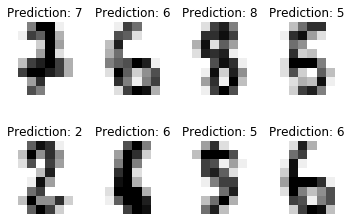

In [87]:
fig = plt.figure()
for index in range(8):
    plt.subplot(2, 4, index+1)
    plt.axis('off')
    plt.imshow(X_test[index+1,:].reshape(8,8),cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % predicted[index+1])